In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
print("Environment ready!")

Environment ready!


In [99]:
df = pd.read_csv(r"D:\Data Analyst\archive\train.csv")
df.head()
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [100]:
df.shape

(9800, 18)

In [101]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   str    
 2   Order Date     9800 non-null   str    
 3   Ship Date      9800 non-null   str    
 4   Ship Mode      9800 non-null   str    
 5   Customer ID    9800 non-null   str    
 6   Customer Name  9800 non-null   str    
 7   Segment        9800 non-null   str    
 8   Country        9800 non-null   str    
 9   City           9800 non-null   str    
 10  State          9800 non-null   str    
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   str    
 13  Product ID     9800 non-null   str    
 14  Category       9800 non-null   str    
 15  Sub-Category   9800 non-null   str    
 16  Product Name   9800 non-null   str    
 17  Sales          9800 non-null   float64
dtypes: float64(2), int6

In [102]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='str')

In [103]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [104]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)
df["Ship Date"] = pd.to_datetime(df["Ship Date"], dayfirst=True)
df.dtypes

Row ID                    int64
Order ID                    str
Order Date       datetime64[us]
Ship Date        datetime64[us]
Ship Mode                   str
Customer ID                 str
Customer Name               str
Segment                     str
Country                     str
City                        str
State                       str
Postal Code             float64
Region                      str
Product ID                  str
Category                    str
Sub-Category                str
Product Name                str
Sales                   float64
dtype: object

In [105]:
df["Order month"] = df["Order Date"].dt.month
df["Order year"] = df["Order Date"].dt.year
df["Shipping days"] = -(df["Order Date"] - df["Ship Date"]).dt.days
df[["Shipping days", "Order month", "Order year"]]
df["Order Date"].dt.weekday

0       2
1       2
2       0
3       1
4       1
       ..
9795    6
9796    1
9797    1
9798    1
9799    1
Name: Order Date, Length: 9800, dtype: int32

In [106]:
df["Shipping days"].describe()

count    9800.000000
mean        3.961122
std         1.749614
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Shipping days, dtype: float64

In [107]:
df["Order year"].describe()

count    9800.000000
mean     2016.724184
std         1.123984
min      2015.000000
25%      2016.000000
50%      2017.000000
75%      2018.000000
max      2018.000000
Name: Order year, dtype: float64

In [108]:
df["Order month"].describe()

count    9800.000000
mean        7.818469
std         3.281905
min         1.000000
25%         5.000000
50%         9.000000
75%        11.000000
max        12.000000
Name: Order month, dtype: float64

In [109]:
df.groupby("Order month")["Sales"].sum()
# sum_month.describe()

Order month
1      94291.6296
2      59371.1154
3     197573.5872
4     136283.0006
5     154086.7237
6     145837.5233
7     145535.6890
8     157315.9270
9     300103.4117
10    199496.2947
11    350161.7110
12    321480.1695
Name: Sales, dtype: float64

In [110]:
df.groupby("Order year")["Sales"].sum()

Order year
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64

In [111]:
df.groupby(df["Order Date"].dt.weekday)["Sales"].sum()

Order Date
0    348791.5516
1    420535.9243
2    315888.9722
3    142839.2402
4    234710.8402
5    420901.4763
6    377868.7779
Name: Sales, dtype: float64

In [112]:
df["Order Date"].dt.isocalendar().week


0       45
1       45
2       24
3       41
4       41
        ..
9795    20
9796     2
9797     2
9798     2
9799     2
Name: week, Length: 9800, dtype: UInt32

In [113]:
result = df.groupby(["Order year", "Order month", df["Order Date"].dt.weekday])["Sales"].sum()
result = result.reset_index()
result.head(60)

,Order year,Order month,Order Date,Sales
0,2015,1,0,1495.3800
1,2015,1,1,11061.4350
2,2015,1,2,153.0460
3,2015,1,3,149.9500
4,2015,1,4,621.0880
5,2015,1,5,361.9440
6,2015,1,6,362.8640
7,2015,2,0,232.0500
8,2015,2,1,206.9920
9,2015,2,2,2215.5680


In [114]:
highestsales_per_month_each_year = df.groupby(["Order year", "Order month"])["Sales"].sum().reset_index()
highestsales_per_month_each_year.sort_values("Sales", ascending=False)

,Order year,Order month,Sales
46,2018,11,117938.1550
35,2017,12,95739.1210
44,2018,9,86152.8880
47,2018,12,83030.3888
8,2015,9,81623.5268
34,2017,11,79066.4958
10,2015,11,77907.6607
45,2018,10,77448.1312
22,2016,11,75249.3995
23,2016,12,74543.6012


In [115]:
year_month = df.groupby(
    ["Order year", "Order month"]
)["Sales"].sum()

year_month.groupby(level=0).idxmax()


Order year
2015     (2015, 9)
2016    (2016, 11)
2017    (2017, 12)
2018    (2018, 11)
Name: Sales, dtype: object

In [116]:
sorted_within_year = highestsales_per_month_each_year.sort_values(["Order year", "Sales"], ascending= [True, False])
sorted_within_year

,Order year,Order month,Sales
8,2015,9,81623.5268
10,2015,11,77907.6607
11,2015,12,68167.0585
2,2015,3,55205.7970
5,2015,6,34322.9356
6,2015,7,33781.5430
9,2015,10,31453.3930
3,2015,4,27906.8550
7,2015,8,27117.5365
4,2015,5,23644.3030


In [117]:
highestsales_per_month_each_year.loc[
    highestsales_per_month_each_year.groupby("Order year")["Sales"].idxmax()
]


,Order year,Order month,Sales
8,2015,9,81623.5268
22,2016,11,75249.3995
35,2017,12,95739.1210
46,2018,11,117938.1550


In [118]:
lowest_per_month = df.groupby(["Order year", "Order month"])["Sales"].sum()
lowest_per_month.groupby(level=0).idxmin()

Order year
2015    (2015, 2)
2016    (2016, 2)
2017    (2017, 1)
2018    (2018, 2)
Name: Sales, dtype: object

In [119]:
# 1️⃣ Highest Revenue Year
# Which year had the highest total sales?
# Return only the year and total sales.
highest_revenue = df.groupby("Order year")["Sales"].sum().reset_index()
highest_revenue.loc[3]

# 2️⃣ Lowest Performing Month Across All Years
# lowest_month = df.groupby(["Order year","Order month"])["Sales"].sum().reset_index()
# lowest_month.loc[lowest_month["Sales"].idxmin()]
# Which (year, month) combination had the lowest total sales overall?
lowest_month = df.groupby(["Order year","Order month"])["Sales"].sum()
lowest_month.loc[lowest_month.idxmin()]


# 3️⃣ Best Month Inside Each Year
# For every year, find the month with highest sales.
# Return year, month, and sales.
highest_each_year = df.groupby(["Order year","Order month"])["Sales"].sum()
highest_each_year.loc[highest_each_year.groupby(level=0).idxmax()]

# 4️⃣ Worst Month Inside Each Year
# For every year, find the lowest performing month.
worst_each_year = df.groupby(["Order year","Order month"])["Sales"].sum()
worst_each_year.loc[highest_each_year.groupby(level=0).idxmin()].reset_index()

# 5️⃣ Rank Months Within Each Year
# Add a new column that ranks months inside each year based on Sales (highest = rank 1).
year_month = df.groupby(["Order year","Order month"])["Sales"].sum().reset_index()
year_month["Rank"] = year_month.groupby("Order year")["Sales"].rank(ascending = False)
year_month

# 6️⃣ Only 2018 Analysis
# In 2018:
# Which month had highest sales?
# What percentage of total 2018 sales did that month contribute?
data_set = df.groupby(["Order year","Order month"])["Sales"].sum().reset_index()
data_2018 = data_set[data_set["Order year"]==2018]
top_sale = data_2018.loc[data_set["Sales"].idxmax()]
percentage = (top_sale["Sales"]/data_2018["Sales"].sum())*100
percentage

#Each month contribution percentage within a year
data_set["Percentage"] = (data_set["Sales"]/ data_set.groupby("Order year")["Sales"].transform("sum"))*100
data_set

# 7️⃣ Sales Greater Than Year Average
# Show all months where monthly sales were greater than that year’s average monthly sales.
# (Hint: transform will be useful)
data_set["avg_yearly"] = data_set.groupby("Order year")["Sales"].transform("mean")
abv_avg = data_set[data_set["Sales"] > data_set["avg_yearly"]]
abv_avg

# 8️⃣ Consistent High Performer Month
# Which month number (1–12) appears most frequently as top-performing month across years?
# (Detect seasonality pattern)
okeyo = df.groupby(["Order year","Order month"])["Sales"].sum().reset_index()
highest_sales = okeyo.loc[okeyo.groupby("Order year")["Sales"].idxmax()]
highest_sales["Order month"].value_counts()

# 9️⃣ Year With Most Stable Sales
# Which year has the lowest standard deviation in monthly sales?
# (Meaning most consistent year)
std_dev = okeyo.groupby("Order year")["Sales"].std()
std_dev[std_dev.idxmin()]

# 🔟 First Month To Cross 100k Sales
# In each year, find the first month where sales exceeded 100000.
# (Return only year and month)
filtered = okeyo[okeyo["Sales"]>100000]
filtered.loc[filtered.groupby("Order year")["Order month"].idxmin()]

# 1️⃣1️⃣ Sales Growth Month-to-Month
# For each year, calculate month-over-month sales difference.
# Return the month where maximum growth happened inside each year.
# (Advanced thinking — uses diff)
okeyo = okeyo.sort_values(["Order year","Order month"])
okeyo["diff_growth"] = okeyo.groupby("Order year")["Sales"].diff()
okeyo.loc[okeyo.groupby("Order year")["diff_growth"].idxmax()]


,Order year,Order month,Sales,diff_growth
8,2015,9,81623.5268,54505.9903
22,2016,11,75249.3995,44237.6620
32,2017,9,69193.3909,38651.1906
46,2018,11,117938.1550,40490.0238


In [120]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   str           
 2   Order Date     9800 non-null   datetime64[us]
 3   Ship Date      9800 non-null   datetime64[us]
 4   Ship Mode      9800 non-null   str           
 5   Customer ID    9800 non-null   str           
 6   Customer Name  9800 non-null   str           
 7   Segment        9800 non-null   str           
 8   Country        9800 non-null   str           
 9   City           9800 non-null   str           
 10  State          9800 non-null   str           
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   str           
 13  Product ID     9800 non-null   str           
 14  Category       9800 non-null   str           
 15  Sub-Category   9800 non-null   s

In [121]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Order month       0
Order year        0
Shipping days     0
dtype: int64

In [122]:
df["Sales"].describe()
np.mean(df["Sales"])

np.float64(230.76905945918367)

In [123]:
#df.index
#df.loc[np.random.choice(df.index, 20), "Sales"] = np.nan
#df["Sales"] = df["Sales"].fillna(df["Sales"].median())
#df.info()

In [124]:
np.median(df["Sales"])

np.float64(54.489999999999995)

In [125]:
np.std(df["Sales"])

np.float64(626.619901988719)

In [126]:
np.percentile(df["Sales"], [25, 50, 75, 90, 95, 99])

array([  17.248 ,   54.49  ,  210.605 ,  575.932 ,  959.984 , 2480.2078])

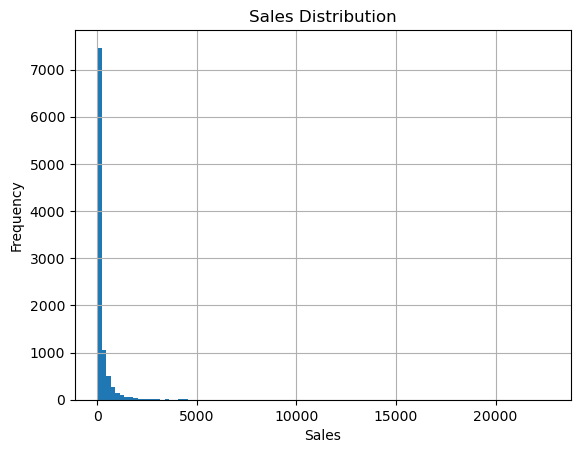

In [127]:
plt.hist(df["Sales"], bins = 100)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
# plt.xscale("log")
plt.grid()
plt.show()

In [128]:
df["Sales"].describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

In [129]:
#PHASE: Revenue Concentration Analysis (Pareto / 80-20 Rule)
#sorting sales in decending order
df_sorted = df.sort_values(by="Sales", ascending=False).reset_index(drop=True)
df_sorted.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order month,Order year,Shipping days
0,2698,CA-2015-145317,2015-03-18,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,32216.0,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,3,2015,5
1,6827,CA-2017-118689,2017-10-02,2017-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,47905.0,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,10,2017,7
2,8154,CA-2018-140151,2018-03-23,2018-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,98115.0,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,3,2018,2
3,2624,CA-2018-127180,2018-10-22,2018-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,10024.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,10,2018,2
4,4191,CA-2018-166709,2018-11-17,2018-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,19711.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,11,2018,5


In [130]:
#calculate Cumulative Revenue
df_sorted["Cumulative_Revenue"] = df_sorted["Sales"].cumsum()
#Calculate Cumulative % Contribution
total_sales = df_sorted["Sales"].sum()
df_sorted["Cumulative_percentage"] = (df_sorted["Cumulative_Revenue"]/total_sales)*100
df_sorted.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Order month,Order year,Shipping days,Cumulative_Revenue,Cumulative_percentage
0,2698,CA-2015-145317,2015-03-18,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,3,2015,5,22638.480,1.001022
1,6827,CA-2017-118689,2017-10-02,2017-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,10,2017,7,40138.430,1.774830
2,8154,CA-2018-140151,2018-03-23,2018-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,3,2018,2,54138.390,2.393876
3,2624,CA-2018-127180,2018-10-22,2018-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,10,2018,2,65338.358,2.889113
4,4191,CA-2018-166709,2018-11-17,2018-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,11,2018,5,75838.328,3.353398


In [131]:
#identify top 10% of orders
top_10_percentage = int(0.10 * len(df_sorted))
top_10_revenue = df_sorted.iloc[:top_10_percentage]["Sales"].sum()
revenue_share = (top_10_revenue/total_sales)*100
print("Top 10% orders contribute:", revenue_share, "% of total revenue")

Top 10% orders contribute: 60.39114195036171 % of total revenue


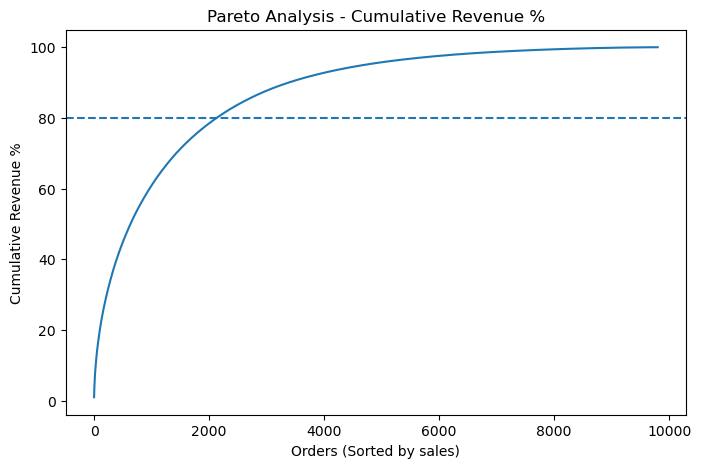

In [132]:
#Visulize Pareto Curve
plt.figure(figsize=(8,5))
plt.plot(df_sorted["Cumulative_percentage"])
plt.axhline(80, linestyle="--")
plt.title("Pareto Analysis - Cumulative Revenue %")
plt.xlabel("Orders (Sorted by sales)")
plt.ylabel("Cumulative Revenue %")
plt.show()

In [133]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Order month', 'Order year', 'Shipping days'],
      dtype='str')

In [134]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order month,Order year,Shipping days
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11,2017,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11,2017,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,6,2017,4
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10,2016,7
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10,2016,7


In [135]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   str           
 2   Order Date     9800 non-null   datetime64[us]
 3   Ship Date      9800 non-null   datetime64[us]
 4   Ship Mode      9800 non-null   str           
 5   Customer ID    9800 non-null   str           
 6   Customer Name  9800 non-null   str           
 7   Segment        9800 non-null   str           
 8   Country        9800 non-null   str           
 9   City           9800 non-null   str           
 10  State          9800 non-null   str           
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   str           
 13  Product ID     9800 non-null   str           
 14  Category       9800 non-null   str           
 15  Sub-Category   9800 non-null   s

In [136]:
#Phase 2 – Revenue Drivers (Based on YOUR Dataset)
thresold = df["Sales"].quantile(0.99)
high_sales = df[df["Sales"]>thresold]
high_sales.shape

(98, 21)

In [137]:
# Which category drives revenue
# ️Which sub-category creates high-value orders
# ️Which segment generates higher average order value
# Are extreme orders mostly Furniture?
# Are they Corporate bulk buyers?
# Is one sub-category responsible?
high_sales["Category"].value_counts()

Category
Technology         50
Office Supplies    26
Furniture          22
Name: count, dtype: int64

In [138]:
high_sales["Sub-Category"].value_counts()

Sub-Category
Machines       26
Binders        15
Copiers        15
Chairs         12
Phones          8
Supplies        6
Bookcases       5
Tables          5
Appliances      3
Storage         2
Accessories     1
Name: count, dtype: int64

In [139]:
high_sales["Segment"].value_counts()

Segment
Consumer       49
Corporate      30
Home Office    19
Name: count, dtype: int64

In [140]:
#Category Revenue Contribution
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
category_sales

Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

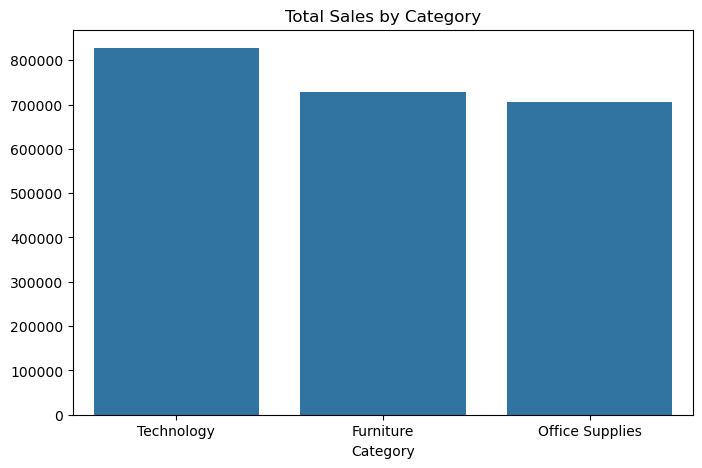

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Sales by Category")
plt.show()

In [142]:
subcategory_sales = df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)
subcategory_sales.head(10)

Sub-Category
Phones         327782.4480
Chairs         322822.7310
Storage        219343.3920
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    164186.7000
Copiers        146248.0940
Bookcases      113813.1987
Appliances     104618.4030
Name: Sales, dtype: float64

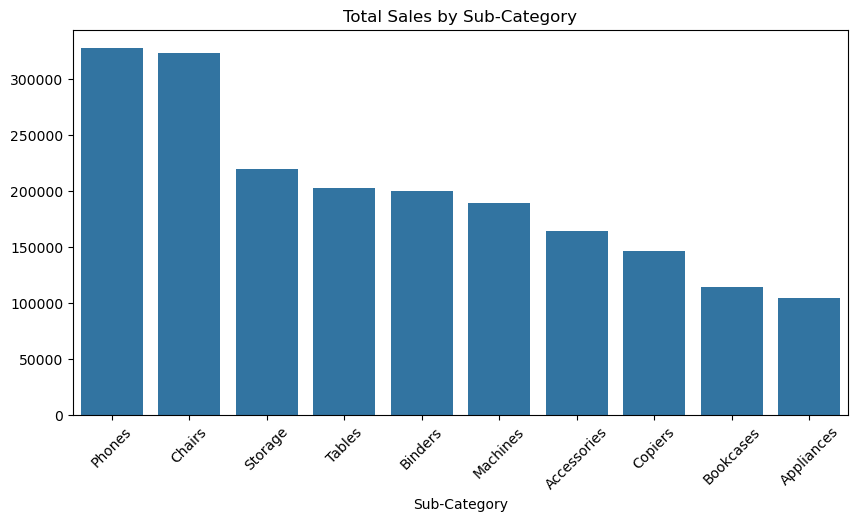

In [143]:
total_sub = subcategory_sales.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=total_sub.index, y=total_sub.values)
plt.title("Total Sales by Sub-Category")
plt.xticks(rotation=45)
plt.show()

In [144]:
# Total revenue shows volume.
# Mean shows spending behavior.
segment_avg = df.groupby("Segment")["Sales"].mean().sort_values(ascending=False)
segment_avg

Segment
Home Office    243.403309
Corporate      233.150720
Consumer       225.065777
Name: Sales, dtype: float64

In [145]:
#Region Performance
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
region_sales

Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64

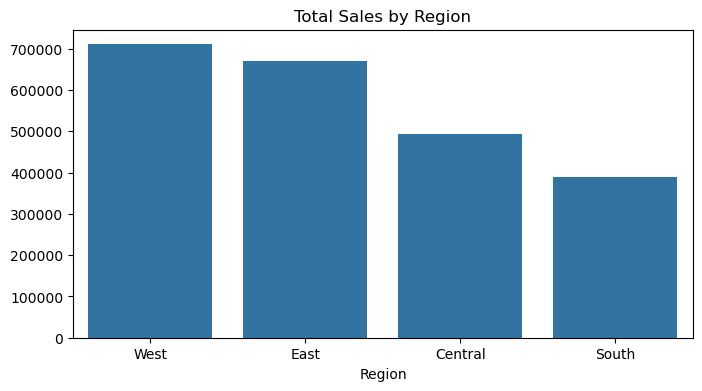

In [146]:
plt.figure(figsize=(8,4))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Total Sales by Region")
plt.show()

In [147]:
# Shipping Days vs Sales
df[["Shipping days", "Sales"]].corr()

,Shipping days,Sales
Shipping days,1.000000,-0.005712
Sales,-0.005712,1.000000


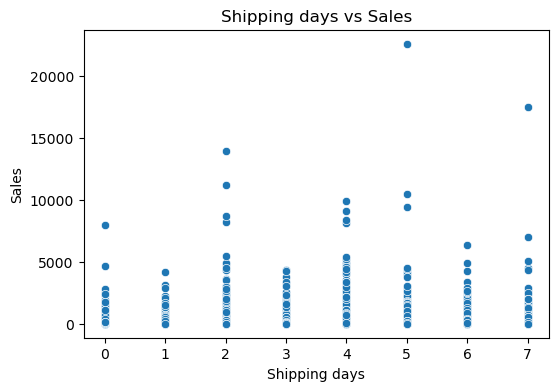

In [148]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Shipping days", y="Sales", data=df)
plt.title("Shipping days vs Sales")
plt.show()

In [149]:
segment_revenue = df.groupby("Segment")["Sales"].sum()
segment_revenue / segment_revenue.sum() * 100


Segment
Consumer       50.764619
Corporate      30.443638
Home Office    18.791743
Name: Sales, dtype: float64

In [150]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Order month', 'Order year', 'Shipping days'],
      dtype='str')

In [151]:
# Revenue by Segment
segment_sales = df.groupby("Segment")["Sales"].sum().sort_values(ascending=False)
segment_sales

Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64

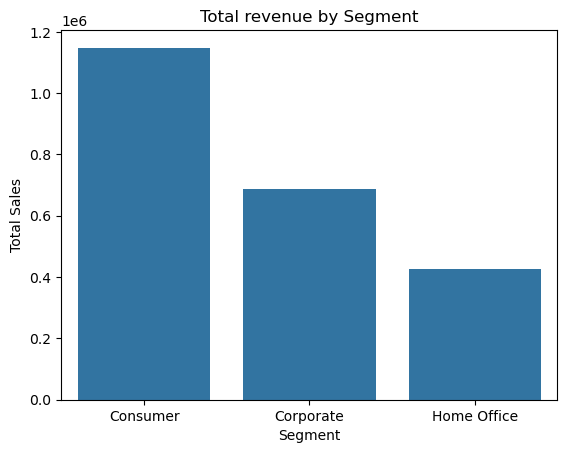

In [152]:
sns.barplot(x=segment_sales.index, y=segment_sales.values)
plt.title("Total revenue by Segment")
plt.ylabel("Total Sales")
plt.show()


In [153]:
#Customer Concentration
customer_sales = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False)
top_customer = customer_sales.head(10)
top_customer

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64

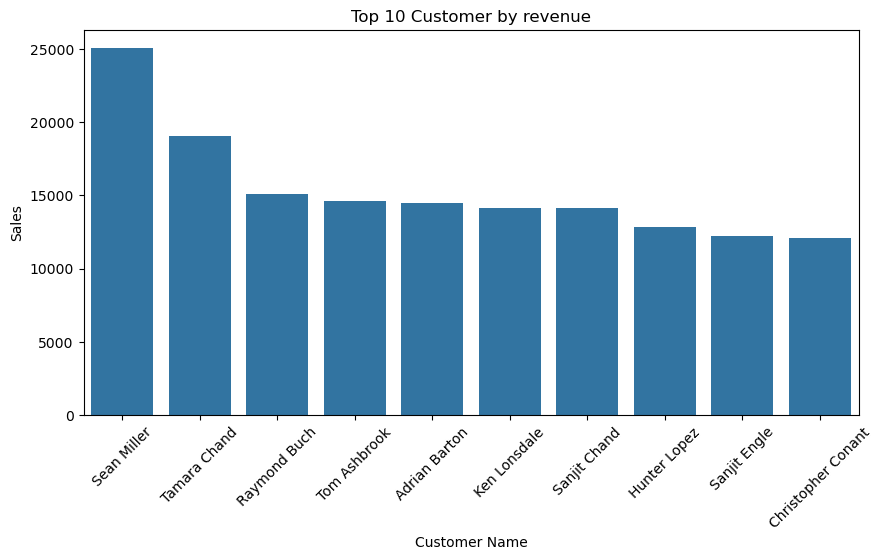

In [154]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_customer.index, y=top_customer.values)
plt.title("Top 10 Customer by revenue")
plt.xticks(rotation=45)
plt.ylabel("Sales")
plt.show()

In [155]:
#Time-Based Growth
# yearly trend
year_sales = df.groupby("Order year")["Sales"].sum()
year_sales

Order year
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64

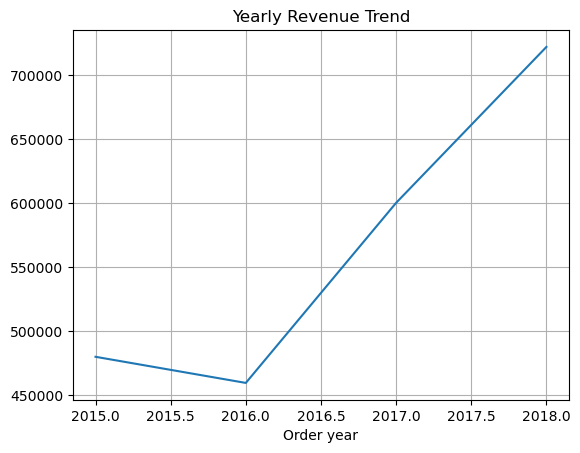

In [156]:
sns.lineplot(x=year_sales.index, y=year_sales.values)
plt.title("Yearly Revenue Trend")
plt.grid()
plt.show()

In [157]:
# Monthly seasonality
month_sales = df.groupby("Order month")["Sales"].sum()
month_sales

Order month
1      94291.6296
2      59371.1154
3     197573.5872
4     136283.0006
5     154086.7237
6     145837.5233
7     145535.6890
8     157315.9270
9     300103.4117
10    199496.2947
11    350161.7110
12    321480.1695
Name: Sales, dtype: float64

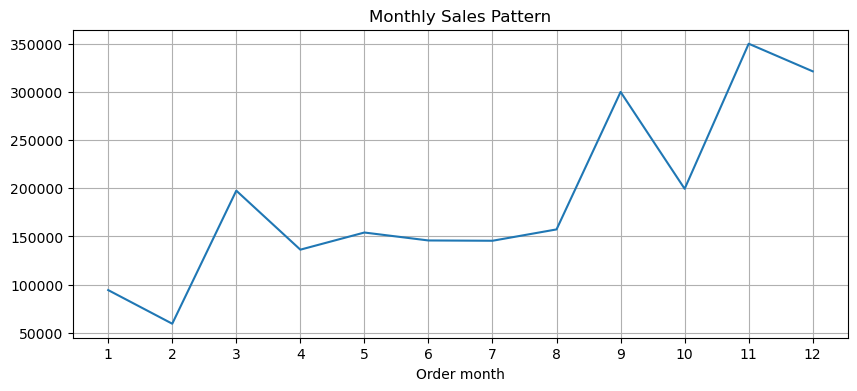

In [158]:
plt.figure(figsize=(10,4))
sns.lineplot(x=month_sales.index, y=month_sales.values)
plt.title("Monthly Sales Pattern")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.grid()
plt.show()

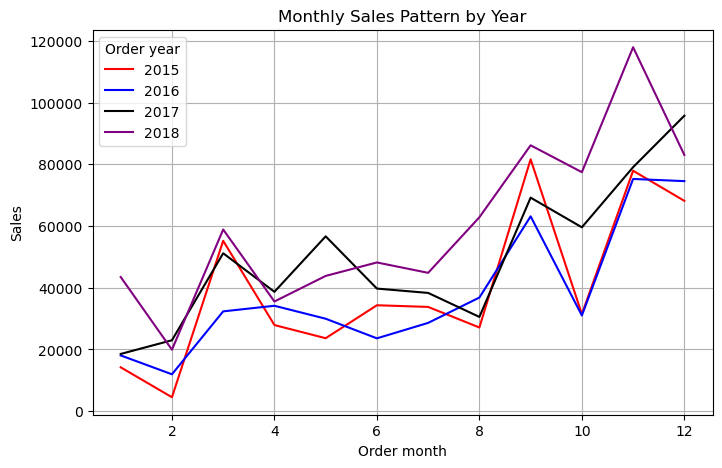

In [159]:
#time-series trend
monthly_sales = df.groupby(["Order year", "Order month"])["Sales"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x="Order month", y="Sales", hue="Order year", data=monthly_sales, palette=["red","blue","black","purple"])
plt.title("Monthly Sales Pattern by Year")
plt.style.use("default")
plt.grid()
plt.show()

In [160]:
#Shipping Mode Usage
shipping_mode = df.groupby("Ship Mode")["Sales"].sum().sort_values(ascending=False)
shipping_mode

Ship Mode
Standard Class    1.340831e+06
Second Class      4.499142e+05
First Class       3.455723e+05
Same Day          1.252190e+05
Name: Sales, dtype: float64

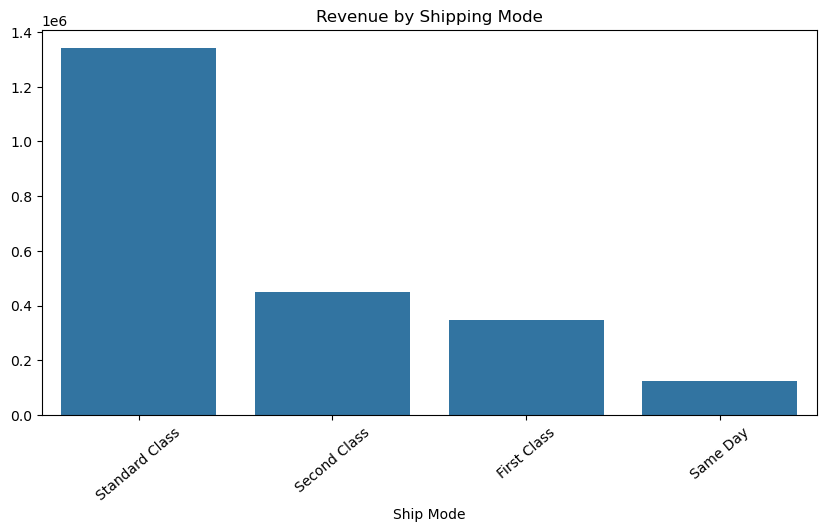

In [161]:
plt.figure(figsize=(10,5))
sns.barplot(x=shipping_mode.index, y=shipping_mode.values)
plt.xticks(rotation=40)
plt.title("Revenue by Shipping Mode")
plt.show()

In [162]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Order month       0
Order year        0
Shipping days     0
dtype: int64

In [163]:
df = df.drop(columns=["Postal Code"])
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Order month      0
Order year       0
Shipping days    0
dtype: int64

In [164]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Order month', 'Order year', 'Shipping days'],
      dtype='str')

In [165]:
df_clean = df.copy()
df_clean

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order month,Order year,Shipping days
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11,2017,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11,2017,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,6,2017,4
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10,2016,7
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10,2016,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,5,2017,7
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,1,2016,5
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,1,2016,5
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,1,2016,5


In [166]:
df_clean.info()

<class 'pandas.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   str           
 2   Order Date     9800 non-null   datetime64[us]
 3   Ship Date      9800 non-null   datetime64[us]
 4   Ship Mode      9800 non-null   str           
 5   Customer ID    9800 non-null   str           
 6   Customer Name  9800 non-null   str           
 7   Segment        9800 non-null   str           
 8   Country        9800 non-null   str           
 9   City           9800 non-null   str           
 10  State          9800 non-null   str           
 11  Region         9800 non-null   str           
 12  Product ID     9800 non-null   str           
 13  Category       9800 non-null   str           
 14  Sub-Category   9800 non-null   str           
 15  Product Name   9800 non-null   s

<h1 style="color:#404040;">Final KPI List</h1>

<div style="background-color:#ffffff; padding:25px; border-radius:10px; border:1px solid #dcdcdc; box-shadow:0 2px 6px rgba(0,0,0,0.05); font-family:'Segoe UI', Arial, sans-serif; max-width:800px;">

<h2 style="margin-top:0; color:#1f3a5f; border-bottom:2px solid #1f3a5f; padding-bottom:8px;">
1. Total Revenue 
</h2>

<p><strong style="color:#2c3e50;">Definition:</strong><br>
Total sales generated across all orders in the selected time period.</p>

<p><strong style="color:#2c3e50;">Why it Matters:</strong><br>
Measures overall business size and performance level.</p>

<p><strong style="color:#2c3e50;">Business Insight:</strong><br>
Revenue shows consistent growth trend except one temporary dip year.</p>

</div>

In [167]:
# total Revenue
# This is the most basic business health metric.
total_revenue = df_clean["Sales"].sum()
total_revenue

np.float64(2261536.7827)

<div style="background-color:#ffffff; padding:25px; border-radius:10px; border:1px solid #dcdcdc; box-shadow:0 2px 6px rgba(0,0,0,0.05); font-family:'Segoe UI', Arial, sans-serif; max-width:800px;">

<h2 style="margin-top:0; color:#1f3a5f; border-bottom:2px solid #1f3a5f; padding-bottom:8px;">
2. Total Order
</h2>

<p><strong style="color:#2c3e50;">Definition:</strong><br>
Total number of orders placed in the selected time period.</p>

<p><strong style="color:#2c3e50;">Why it Matters:</strong><br>
Shows market demand and business volume.</p>

<p><strong style="color:#2c3e50;">Business Insight:</strong><br>
You have a moderate order volume but revenue is concentrated in fewer high-value orders.</p>


</div>

In [168]:
# Total Orders
# Important: One order can contain multiple products (multiple rows).
total_orders = df_clean["Order ID"].nunique()
total_orders

4922

<div style="background-color:#ffffff; padding:25px; border-radius:10px; border:1px solid #dcdcdc; box-shadow:0 2px 6px rgba(0,0,0,0.05); font-family:'Segoe UI', Arial, sans-serif; max-width:800px;">

<h2 style="margin-top:0; color:#1f3a5f; border-bottom:2px solid #1f3a5f; padding-bottom:8px;">
3. Average Order Value (AOV)
</h2>

<p><strong style="color:#2c3e50;">Definition:</strong><br>
Average revenue generated per order.</p>

<p><strong style="color:#2c3e50;">Why it Matters:</strong><br>
Shows customer spending behavior.</p>

<p><strong style="color:#2c3e50;">Business Insight:</strong><br>
Since revenue is highly concentrated, AOV is likely elevated due to high-value corporate orders.</p>


</div>

In [169]:
# Average Order Value (AOV
avg_order_value = total_revenue/total_orders
avg_order_value
# If AOV increases → revenue grows without needing more customers.

np.float64(459.4751691791954)

<div style="background-color:#ffffff; padding:25px; border-radius:10px; border:1px solid #dcdcdc; box-shadow:0 2px 6px rgba(0,0,0,0.05); font-family:'Segoe UI', Arial, sans-serif; max-width:800px;">

<h2 style="margin-top:0; color:#1f3a5f; border-bottom:2px solid #1f3a5f; padding-bottom:8px;">
4. Revenue by Segment
</h2>

<p><strong style="color:#2c3e50;">Definition:</strong><br>
Total revenue contribution from each customer segment.</p>

<p><strong style="color:#2c3e50;">Why it Matters:</strong><br>
Identifies which segment drives business growth.</p>

<p><strong style="color:#2c3e50;">Business Insight:</strong><br>
Corporate segment contributes high-value orders.</p>


</div>

In [170]:
# Revenue by Segment
segment_percentage = (segment_sales/total_revenue)*100
segment_percentage

Segment
Consumer       50.764619
Corporate      30.443638
Home Office    18.791743
Name: Sales, dtype: float64

<div style="background-color:#ffffff; padding:25px; border-radius:10px; border:1px solid #dcdcdc; box-shadow:0 2px 6px rgba(0,0,0,0.05); font-family:'Segoe UI', Arial, sans-serif; max-width:800px;">

<h2 style="margin-top:0; color:#1f3a5f; border-bottom:2px solid #1f3a5f; padding-bottom:8px;">
5. Revenue by Region
</h2>

<p><strong style="color:#2c3e50;">Definition:</strong><br>
Revenue contribution by region.</p>

<p><strong style="color:#2c3e50;">Why it Matters:</strong><br>
Measures geographic dependency.</p>

<p><strong style="color:#2c3e50;">Business Insight:</strong><br>
Revenue concentrated in certain regions.</p>


</div>

In [171]:
#Revenue by Region
region_percentage = (region_sales/total_revenue)*100
region_percentage

Region
West       31.404295
East       29.604591
Central    21.783723
South      17.207390
Name: Sales, dtype: float64

<div style="background-color:#ffffff; padding:25px; border-radius:10px; border:1px solid #dcdcdc; box-shadow:0 2px 6px rgba(0,0,0,0.05); font-family:'Segoe UI', Arial, sans-serif; max-width:800px;">

<h2 style="margin-top:0; color:#1f3a5f; border-bottom:2px solid #1f3a5f; padding-bottom:8px;">
6. Revenue by Category
</h2>

<p><strong style="color:#2c3e50;">Definition:</strong><br>
Sales contribution by product category.</p>

<p><strong style="color:#2c3e50;">Why it Matters:</strong><br>
Identifies dominant product lines.</p>

<p><strong style="color:#2c3e50;">Business Insight:</strong><br>
Few categories dominate revenue.</p>


</div>

In [172]:
# Revenue by Category
category_percentage = (category_sales/total_revenue)*100
category_percentage

Category
Technology         36.588212
Furniture          32.219621
Office Supplies    31.192167
Name: Sales, dtype: float64

<div style="background-color:#ffffff; padding:25px; border-radius:10px; border:1px solid #dcdcdc; box-shadow:0 2px 6px rgba(0,0,0,0.05); font-family:'Segoe UI', Arial, sans-serif; max-width:800px;">

<h2 style="margin-top:0; color:#1f3a5f; border-bottom:2px solid #1f3a5f; padding-bottom:8px;">
7. Revenue Concentration (Top 10%)
</h2>

<p><strong style="color:#2c3e50;">Definition:</strong><br>
Percentage of total revenue generated by the top 10% highest-value orders.</p>

<p><strong style="color:#2c3e50;">Why it Matters:</strong><br>
Measures revenue dependency risk.</p>

<p><strong style="color:#2c3e50;">Business Insight:</strong><br>
Revenue is highly concentrated (small % driving majority of revenue).</p>


</div>

In [173]:
# Revenue Concentration (Top 10%)
df_sorting = df_clean.sort_values(by="Sales", ascending=False)
top_10_count = int(0.10 * len(df_sorting))
top_10_rev = df_sorting.iloc[:top_10_count]["Sales"].sum()
top_10_percent = (top_10_rev / total_revenue) * 100
top_10_percent

np.float64(60.39114195036171)

<div style="background-color:#ffffff; padding:25px; border-radius:10px; border:1px solid #dcdcdc; box-shadow:0 2px 6px rgba(0,0,0,0.05); font-family:'Segoe UI', Arial, sans-serif; max-width:800px;">

<h2 style="margin-top:0; color:#1f3a5f; border-bottom:2px solid #1f3a5f; padding-bottom:8px;">
8. Average Shipping Days
</h2>

<p><strong style="color:#2c3e50;">Definition:</strong><br>
Average shipping days by shipping mode.</p>

<p><strong style="color:#2c3e50;">Why it Matters:</strong><br>
Operational efficiency metric.</p>

<p><strong style="color:#2c3e50;">Business Insight:</strong><br>
Different shipping modes show predictable delivery time differences.</p>


</div>

In [174]:
# Average Shipping Days
avg_shipping_days = df_clean["Shipping days"].mean()
avg_shipping_days

np.float64(3.9611224489795918)

In [175]:
# By ship mode
df.groupby("Ship Mode")["Shipping days"].mean()

Ship Mode
First Class       2.179214
Same Day          0.044610
Second Class      3.249211
Standard Class    5.008363
Name: Shipping days, dtype: float64

<div style="background-color:#ffffff; padding:25px; border-radius:10px; border:1px solid #dcdcdc; box-shadow:0 2px 6px rgba(0,0,0,0.05); font-family:'Segoe UI', Arial, sans-serif; max-width:800px;">

<h2 style="margin-top:0; color:#1f3a5f; border-bottom:2px solid #1f3a5f; padding-bottom:8px;">
9. Year-over-Year Growth %
</h2>

<p><strong style="color:#2c3e50;">Definition:</strong><br>
Percentage change in revenue compared to previous year.</p>

<p><strong style="color:#2c3e50;">Why it Matters:</strong><br>
Measures growth sustainability.</p>

<p><strong style="color:#2c3e50;">Business Insight:</strong><br>
Growth recovered strongly after one negative year.</p>


</div>

In [176]:
# Year-over-Year (YoY) Growth KPI
yearly_revenue = df.groupby("Order year")["Sales"].sum()
yearly_revenue

Order year
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64

In [177]:
yearly_growth = yearly_revenue.pct_change() * 100
yearly_growth

Order year
2015          NaN
2016    -4.255484
2017    30.636812
2018    20.303396
Name: Sales, dtype: float64

<div style="background-color:#ffffff; padding:25px; border-radius:10px; border:1px solid #dcdcdc; box-shadow:0 2px 6px rgba(0,0,0,0.05); font-family:'Segoe UI', Arial, sans-serif; max-width:800px;">

<h2 style="margin-top:0; color:#1f3a5f; border-bottom:2px solid #1f3a5f; padding-bottom:8px;">
10. Monthly Revenue Trend (Seasonality KPI)
</h2>

<p><strong style="color:#2c3e50;">Definition:</strong><br>
Monthly revenue performance across years.</p>

<p><strong style="color:#2c3e50;">Why it Matters:</strong><br>
Identifies seasonal demand fluctuations.</p>

<p><strong style="color:#2c3e50;">Business Insight:</strong><br>
Strong Q4 spikes. Low early-year performance.</p>


</div>

In [178]:
#Monthly Revenue Trend
month_sales

Order month
1      94291.6296
2      59371.1154
3     197573.5872
4     136283.0006
5     154086.7237
6     145837.5233
7     145535.6890
8     157315.9270
9     300103.4117
10    199496.2947
11    350161.7110
12    321480.1695
Name: Sales, dtype: float64

In [179]:
df_clean.to_csv("SuperstoreSales_clean.csv", index=False)

In [180]:
df_clean.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Order month', 'Order year', 'Shipping days'],
      dtype='str')

===================THE END===========================